In [2047]:
import matplotlib.pyplot as plt  
import pandas as pd  
import os
import numpy as np
from astropy.io import fits 

from PIL import Image


#conda install -c astropy photutils

from photutils import centroid_com, centroid_1dg, centroid_2dg

#need to install newer version of scipy from conda, need 1.2 or newer for find_peaks function

from scipy.signal import find_peaks

#for animations
from matplotlib import animation, rc
from IPython.display import HTML

#patches
from matplotlib import patches as patches


from astropy.modeling import models, fitting

#from scipy.interpolate import interp1d
from scipy.signal import savgol_filter

from astropy.modeling.models import custom_model

from scipy.optimize import curve_fit

In [2048]:
#@custom_model
def gauss_offset(x, amplitude=1., mean=0., stddev=1., H=0.):
    
    return H + amplitude * np.exp(-(x - mean) ** 2 / (2 * stddev ** 2))

def gauss_fit(H,x, y):
    mean = sum(x * y) / sum(y)
    stddev = np.sqrt(sum(y * (x - mean) ** 2) / sum(y))
    popt, pcov = curve_fit(gauss_offset, x, y, p0=[H,max(y), mean, stddev])
    return popt

## import our fits file

In [2049]:
#infocus
#im = fits.open("19sep30176-9-stack-darksub.fits")
im = fits.open("gf-cam.20191217.083513.fits")
imarray=im[0].data

### peek at the image array

In [2050]:
print(imarray)

[[414 408 440 ... 498 565 511]
 [422 461 498 ... 569 522 453]
 [490 429 446 ... 574 480 456]
 ...
 [428 454 460 ... 452 497 473]
 [444 406 430 ... 523 526 442]
 [389 423 428 ... 515 466 469]]


In [2051]:
## pick a coordinate for the lower left coordinate of the rectangle
#xorigin=(2000,3200)
xorigin=(600,1300)

##no need to chance these, picking a different width will slow down the animation generation
## the height will cover about 3-4 cross dispersions of the MCF
xwidth=150
yheight=1050

### preview the image

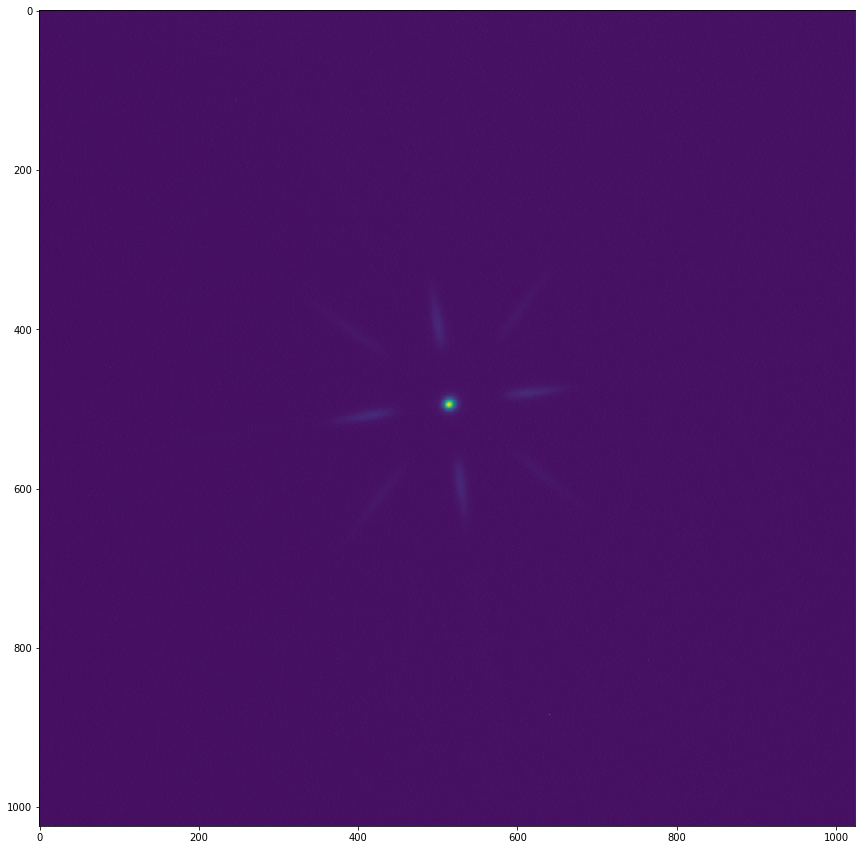

In [2052]:
fig,ax = plt.subplots()

fig.set_size_inches(20, 15)
#ax.imshow(imarray,origin='lower')
ax.imshow(imarray)

#rect=plt.Rectangle((0, 0), 1, 1, color='r')
# Create a Rectangle patch
#rect = patches.Rectangle(xorigin,xwidth,yheight,linewidth=1,edgecolor='r',facecolor='none')

# Add the patch to the Axes
#ax.add_patch(rect)

### Centroid the whole image

In [2053]:
cx, cy = centroid_com(imarray)
print((cx,cy ))   

(516.4608132916455, 508.99952034836343)


In [2054]:
hafbox=40


stellarbox=imarray[int(cy)-hafbox:int(cy)+hafbox,int(cx)-hafbox:int(cx)+hafbox]
#stellarbox=imarray[0:495,int(cy)-hafbox:int(cy)+hafbox]

xmean=stellarbox.sum(axis=0)
ymean=stellarbox.sum(axis=1)


#H, A, x0, stddev = gauss_fit(ymean,np.arange(0,hafbox*2))

csx=(np.argmax(xmean))
csy=(np.argmax(ymean))


#csx=np.argmax(stellarbox,axis=0)
#csy=np.argmax(stellarbox,axis=1)

#csx,csy = centroid_com(stellarbox)
sx = cx-hafbox+csx
sy = cy-hafbox+csy
#print(sx,sy)

print(sx)
print(sy)


514.4608132916455
494.99952034836343


(79.5, -0.5)

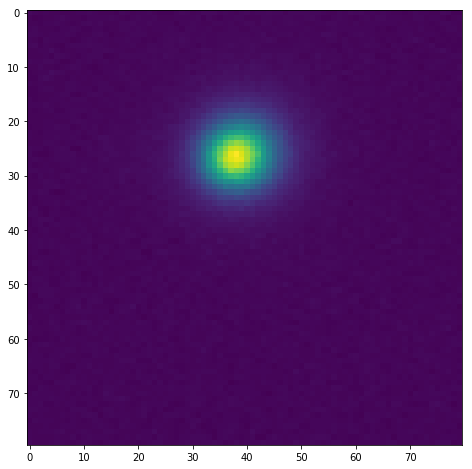

In [2055]:
fig,ax = plt.subplots()

fig.set_size_inches(8, 8)
ax.imshow(stellarbox,origin='lower')

ax=plt.gca()                            # get the axis
ax.set_ylim(ax.get_ylim()[::-1]) 


### plot the centroid coordinates

(1023.5, -0.5)

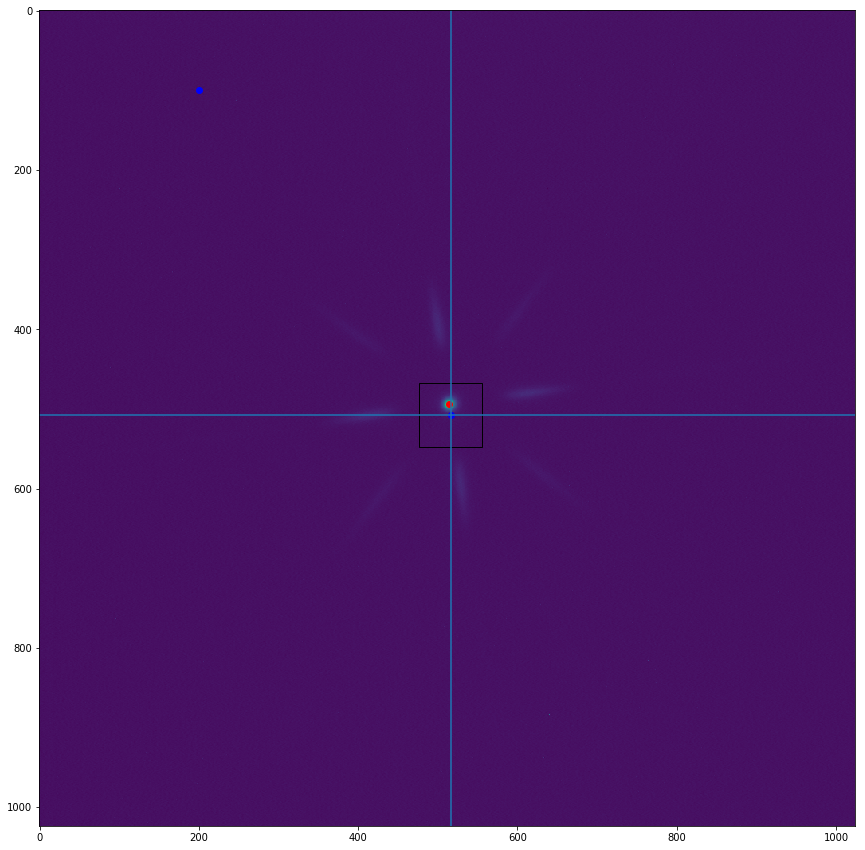

In [2056]:
fig,ax = plt.subplots()

fig.set_size_inches(20, 15)
ax.imshow(imarray,origin='lower')


ax.plot(int(cx),int(cy), 'bo')

ax.plot(int(sx),int(sy), 'ro')

p = plt.Rectangle((int(cx)-hafbox, int(cy)-hafbox), 2*hafbox, 2*hafbox, fill=False)
#p = plt.Rectangle((200, 100), 2*hafbox, 2*hafbox, fill=False)
#p.set_transform(ax.transAxes)
#p.set_clip_on(False)
ax.add_patch(p)

ax.plot(200,100,'bo')
ax.axvline(516)
ax.axhline(508)

ax=plt.gca()                            # get the axis
ax.set_ylim(ax.get_ylim()[::-1]) 




### plot a 120x400 crop of the image

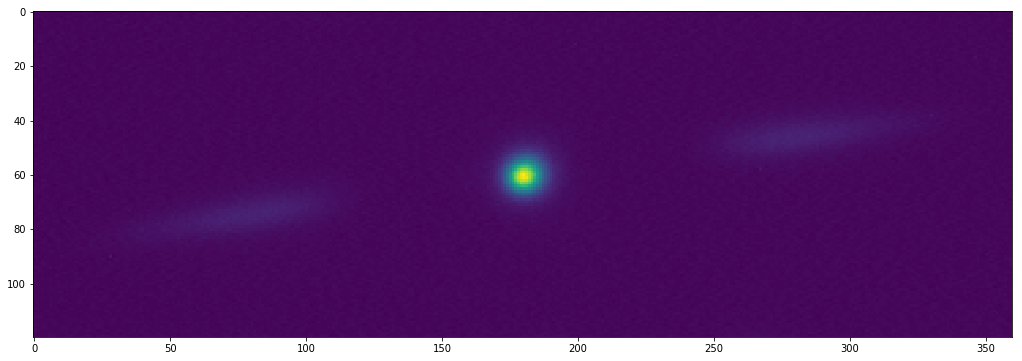

In [2057]:
bds=60
bdl=180

subim=imarray[int(sy)-bds:int(sy)+bds,int(sx)-bdl:int(sx)+bdl]

fig,ax = plt.subplots()

fig.set_size_inches(18, 6)
#ax.imshow(subim,origin='lower',cmap='gray')

ax.imshow(subim)

#ax.plot(int(cy),int(cx), 'bo')

In [2058]:
print(int(sy)-bds)
print(int(sy)+bds)
print(int(sx)-bdl)
print(int(sx)+bdl)

434
554
334
694


In [2059]:
554-434

120

### populate an array max intensity values of each column

In [1980]:
hormax=np.amax(subim,axis=0)

print(hormax)


[ 539  542  581  557  535  531  551  536  548  566  555  558  574  592
  551  538  558  542  548  555  560  578  572  554  594  562  572  596
  820  626  597  618  620  612  628  659  677  667  690  728  716  702
  715  686  720  753  720  792  854  760  807  785  779  817  806  844
  861  881  834  865  915  905  912  934  954  915  976  960  991 1043
 1016 1025  992 1011 1071 1083 1027 1026 1044 1066 1077 1070 1033 1020
 1066 1053 1038 1038 1020 1053 1003  989 1040  970  951  976  938  909
  907  877  893  874  846  823  796  832  775  755  691  685  680  684
  641  619  606  621  607  600  575  565  583  610  594  556  566  550
  552  538  559  543  544  553  583  547  578  564  544  557  558  580
  569  577  564  549  543  566  592  558  562  537  550  583  565  555
  555  603  593  586  589  618  637  618  619  636  650  680  732  737
  853 1022 1230 1478 1954 2457 3224 4226 5208 6221 7035 7535 7774 7487
 6828 6231 5558 4391 3632 2844 2338 1909 1697 1299 1082  979  875  790
  738 

### populate an array with the index of the column pixel intensity max

In [1981]:
horargmax=np.argmax(subim,axis=0)

horargmax=horargmax.astype(float)

print(horargmax)

[117.  39.  11.  62.  31.  44.  81.  82.  97.  84.  20.  96.  46.  77.
  14.  35.  49.  87.  72.  96.  56.  86.  27.  87.  83.  91.  84.  81.
  90.  85.  82.  82.  84.  83.  80.  80.  82.  82.  83.  80.  80.  82.
  82.  81.  81.  78.  78.  80.  80.  77.  78.  81.  79.  77.  77.  79.
  78.  79.  76.  77.  77.  78.  77.  77.  75.  77.  77.  77.  76.  77.
  77.  76.  74.  75.  75.  75.  76.  76.  75.  75.  74.  74.  73.  73.
  75.  74.  75.  73.  75.  73.  72.  71.  72.  72.  73.  72.  73.  72.
  72.  71.  71.  71.  71.  73.  71.  70.  72.  74.  73.  71.  71.  70.
  72.  65.  69.  65.  70.  72.  70.  63.  69.  74.  74.   7.  13.  13.
  87.  68.  58.  71.  65. 113.  70.   3.  56.  34.   1.  59.  75.  45.
  94.  50.  20.  80.  72.  46.  45.  15.  59.  64.  82.  88.  30. 108.
  49.  57.  57.  59.  60.  65.  63.  88.  59.  56.  61.  57.  57.  64.
  63.  61.  60.  59.  60.  61.  60.  60.  60.  61.  61.  60.  60.  61.
  61.  60.  60.  60.  60.  60.  60.  60.  60.  60.  58.  58.  58.  59.
  61. 

In [1982]:
cols=2*bdl
rows=2*bds

In [1983]:
X = np.arange(cols)

### NaN out the columns with no data

In [1984]:
hornanargmax=np.copy(horargmax)
for i in X:
    if hormax[int(i)] < 670:
        hornanargmax[int(i)]=np.nan

In [1985]:
print(hornanargmax)

[nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan 90. nan nan nan nan nan nan nan
 82. nan 83. 80. 80. 82. 82. 81. 81. 78. 78. 80. 80. 77. 78. 81. 79. 77.
 77. 79. 78. 79. 76. 77. 77. 78. 77. 77. 75. 77. 77. 77. 76. 77. 77. 76.
 74. 75. 75. 75. 76. 76. 75. 75. 74. 74. 73. 73. 75. 74. 75. 73. 75. 73.
 72. 71. 72. 72. 73. 72. 73. 72. 72. 71. 71. 71. 71. 73. 71. 70. 72. 74.
 73. 71. 71. 70. nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan 57. 57. 64. 63. 61. 60. 59. 60. 61. 60. 60. 60. 61. 61. 60.
 60. 61. 61. 60. 60. 60. 60. 60. 60. 60. 60. 60. 58. 58. 58. 59. 61. nan
 60. 12. nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan na

## Plot the intensity max position of each column

Text(0.5,0,'Pixel Column')

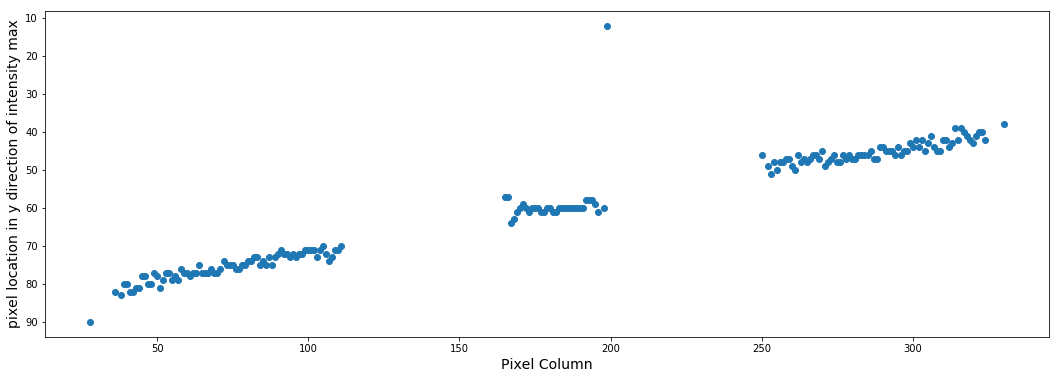

In [1986]:
fig,ax = plt.subplots()

fig.set_size_inches(18, 6)

ax.scatter(X,hornanargmax)
ax=plt.gca()                            # get the axis
ax.set_ylim(ax.get_ylim()[::-1]) 
ax.set_ylabel("pixel location in y direction of intensity max",size=14)
ax.set_xlabel("Pixel Column",size=14)
#plt.scatter(np.linspace(0,60,60),horargmax[60:120])

In [1987]:
#w1r=(60,140)
w1r=(50,100)

w2r=(270,330)



horwing1 = np.polyfit(X[w1r[0]:w1r[1]], horargmax[w1r[0]:w1r[1]], 1)
print(horwing1)

horwing2 = np.polyfit(X[w2r[0]:w2r[1]], horargmax[w2r[0]:w2r[1]], 1)
print(horwing2)

[-0.14789916 86.25848739]
[-0.11717144 79.17617857]


In [1988]:
#p1 = np.poly1d(horwing1)
#p2= np.poly1d(horwing2)

In [1989]:
#plt.figure(figsize=(20, 10))
#plt.scatter(X,hornanargmax)
#plt.plot(X[w1r[0]:w1r[1]],p1(X[w1r[0]:w1r[1]]),color='red')
#plt.text(100,65,'m = ' + str(round(horwing1[0],3)),fontsize=14,color='green')
#plt.plot(X[w2r[0]:w2r[1]],p2(X[w2r[0]:w2r[1]]),color='red')
#plt.text(300,35,'m = ' + str(round(horwing2[0],3)),fontsize=14,color='green')

In [1990]:
ghorwing1 = []

X1=range(w1r[0],w1r[1],1)

for i in X1:
    whichcol = i
    data=subim[:,whichcol]
    y=(data-np.amin(data))/(np.amax(data)-np.amin(data))
    
    x=np.arange(rows)
    
    H, A, x0, stddev = gauss_fit(0.1,x, y)
    
    ghorwing1.append(A)
    
ghorwing1=np.array(ghorwing1)

ghorwing2 = []

X2=range(w2r[0],w2r[1],1)

for i in X2:
    whichcol = i
    data=subim[:,whichcol]
    y=(data-np.amin(data))/(np.amax(data)-np.amin(data))
    
    x=np.arange(rows)
    
    H, A, x0, stddev = gauss_fit(0,x, y)
    
    ghorwing2.append(A)
    
ghorwing2=np.array(ghorwing2)



In [1991]:
print(ghorwing1)
#ghorwing2.shape

[78.69417234 78.83366193 78.60037872 78.9532396  78.08704216 77.99756865
 78.16616739 77.86654286 77.33824274 77.53745473 77.57488895 77.50907911
 77.30347134 76.80196178 76.7696662  76.46157623 76.51635393 76.48999957
 76.06260536 76.20588396 76.02108878 75.85748944 75.61398432 75.36104572
 75.27118151 74.81419743 74.85625645 74.87423389 74.65108712 74.73441208
 74.34662837 74.21611919 73.94500851 73.61817063 73.70099558 73.60461695
 73.17293452 73.07440477 73.16891692 72.89457558 72.46235218 72.51497719
 72.21602662 72.40258173 72.02637631 71.63850117 71.6617661  71.65364962
 71.78357292 71.28835051]


In [1992]:
gaushwing1 = np.polyfit(X1, ghorwing1, 1)
gh1 = np.poly1d(gaushwing1)
gaushwing2 = np.polyfit(X2, ghorwing2, 1)
gh2 = np.poly1d(gaushwing2)

(80.97925777338162, 37.08466731213233)

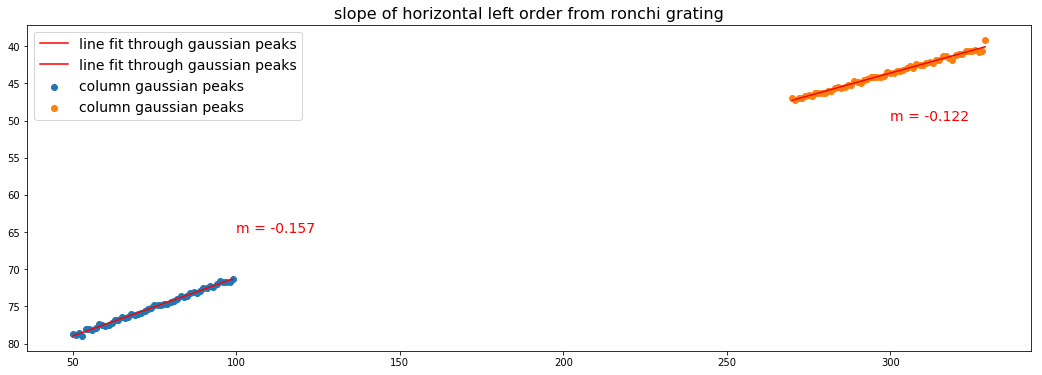

In [1993]:
m_hdiff=str(abs(round(gauswing2[0]-gauswing1[0],3)))

fig,ax = plt.subplots()

fig.set_size_inches(18, 6)

ax.scatter(X1,ghorwing1, label="column gaussian peaks")
ax.plot(X1,gh1(X1),color='red',label="line fit through gaussian peaks")
ax.scatter(X2,ghorwing2, label="column gaussian peaks")
ax.plot(X2,gh2(X2),color='red',label="line fit through gaussian peaks")
ax.text(100,65,'m = ' + str(round(gaushwing1[0],3)),fontsize=14,color='red')
ax.text(300,50,'m = ' + str(round(gaushwing2[0],3)),fontsize=14,color='red')
#ax.text(150,20,'diff between hor wings = ' + m_hdiff,fontsize=14,color='red')
ax.legend(fontsize=14)
ax.set_title("slope of horizontal left order from ronchi grating",fontsize=16)

ax=plt.gca()                            # get the axis
ax.set_ylim(ax.get_ylim()[::-1]) 


## work in the vertical direction

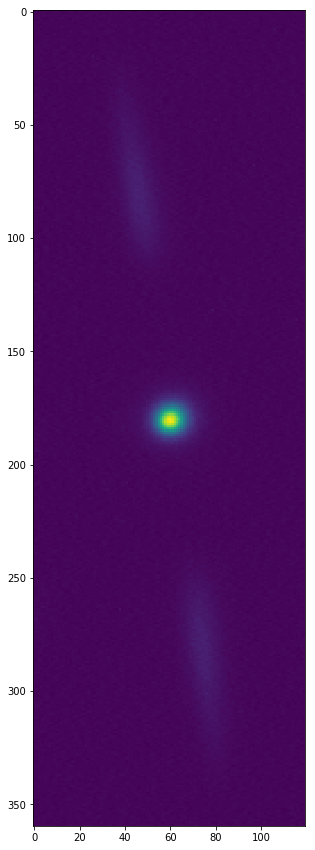

In [2012]:
subvim=imarray[int(sy)-bdl:int(sy)+bdl,int(sx)-bds:int(sx)+bds]

fig,ax = plt.subplots()

fig.set_size_inches(20, 15)
#ax.imshow(subim,origin='lower',cmap='gray')

ax.imshow(subvim)

#ax.plot(int(cy),int(cx), 'bo')

In [2013]:
vermax=np.amax(subvim,axis=1)

print(vermax)


[ 583  551  544  583  546  548  578  567  622  567  582  567  551  564
  560  568  570  560  558  560  694  596  557  550  553  599  605  588
  568  637  637  605  596  623  614  705  661  683  692  686  667  694
  660  682  676  730  725  737  762  740  789  763  771  815  802  802
  814  816  813  882  867  852  896  883  899  922  996  948 1008  994
  957  975  992 1011 1001  984  991 1013 1049 1093 1015 1032 1054 1053
  987 1081 1087 1011 1063  985 1013  962  967  955  969  961  933  907
  912  860  856  866  795  799  775  764  786  669  674  685  628  631
  604  604  595  591  573  582  581  576  585  566  555  561  559  575
  533  575  549  569  563  542  752  566  583  558  663  570  550  546
  564  555  546  548  574  540  550  550  550  550  565  560  560  561
  567  554  561  529  578  577  586  595  609  638  699  683  753  838
  925 1080 1300 1576 1944 2431 3091 3829 4683 5589 6574 7216 7774 7598
 7186 6446 5361 4273 3285 2630 1971 1523 1259  999  857  775  714  686
  650 

### populate an array with the index of the column pixel intensity max

In [2014]:
verargmax=np.argmax(subvim,axis=1)

verargmax=verargmax.astype(float)

print(verargmax)

[ 21.  79.  30.  52.  42.  59.  62.  12. 106. 111.   9.  47.  35.  66.
 118. 101.  87.  30.  81.  36.  26.  33.   9.  75.  39.  44.  39.  39.
  36.  38.  59.  39.  40.  41.  39.  39.  42.  40.  39.  43.  42.  39.
  42.  39.  39.  40.  38.  39.  40.  44.  41.  44.  42.  40.  43.  41.
  41.  43.  42.  43.  43.  42.  43.  43.  45.  45.  43.  44.  44.  46.
  45.  46.  45.  45.  47.  47.  45.  45.  45.  46.  48.  45.  47.  48.
  45.  47.  48.  48.  47.  48.  49.  49.  47.  49.  50.  48.  48.  48.
  49.  49.  50.  49.  50.  51.  50.  50.  51.  53.  52.  51.  51.  48.
  51.  51. 101.  50.   9.  47.  46.  49.  85.  52.  54.  90. 107.  49.
  67.  87.  18.  46.  84.  73.  79.   4.  36.  27. 116.  78.  85.  90.
  22.  28.  28.   8. 116.  30.  71.  96.  11.  73.  32.  49.  12.  15.
 103.   3.  70.  23.  65.  93.  59.  54.  59.  63.  60.  58.  62.  60.
  60.  63.  62.  62.  61.  60.  61.  61.  61.  60.  60.  60.  60.  60.
  60.  59.  60.  61.  60.  61.  60.  62.  61.  63.  59.  63.  61.  64.
  57. 

### NaN out the columns with no data

In [2015]:
vernanargmax=np.copy(verargmax)
for i in X:
    if vermax[int(i)] < 670:
        vernanargmax[int(i)]=np.nan

In [2016]:
print(vernanargmax)

[nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan 26. nan nan nan nan nan nan nan nan nan nan nan nan nan nan 39.
 nan 40. 39. 43. nan 39. nan 39. 39. 40. 38. 39. 40. 44. 41. 44. 42. 40.
 43. 41. 41. 43. 42. 43. 43. 42. 43. 43. 45. 45. 43. 44. 44. 46. 45. 46.
 45. 45. 47. 47. 45. 45. 45. 46. 48. 45. 47. 48. 45. 47. 48. 48. 47. 48.
 49. 49. 47. 49. 50. 48. 48. 48. 49. 49. 50. 49. 50. 51. 50. 50. 51. nan
 52. 51. nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan 79. nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan 60. 58. 62. 60. 60. 63. 62. 62. 61. 60. 61. 61. 61. 60. 60. 60.
 60. 60. 60. 59. 60. 61. 60. 61. 60. 62. 61. 63. 59. 63. 61. 64. nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan na

## Plot the intensity max position of each row

(338.1533725778758, 4.84662742212411)

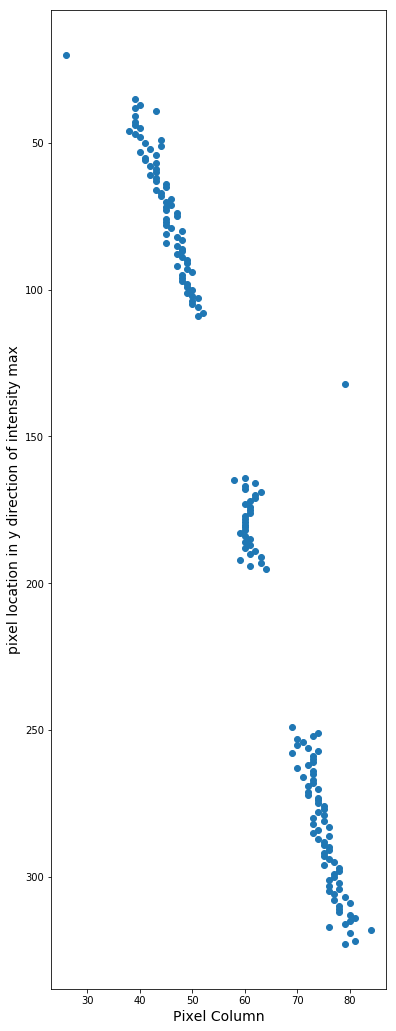

In [2017]:
plt.figure(figsize=(6,18))
plt.scatter(vernanargmax,X)
plt.ylabel("pixel location in y direction of intensity max",size=14)
plt.xlabel("Pixel Column",size=14)
#plt.scatter(np.linspace(0,60,60),horargmax[60:120])

ax=plt.gca()                            # get the axis
ax.set_ylim(ax.get_ylim()[::-1]) 


In [2018]:
#w1r=(60,140)
x1r=(30,90)

x2r=(250,300)


verwing1 = np.polyfit(X[x1r[0]:x1r[1]], verargmax[x1r[0]:x1r[1]], 1)
print(verwing1)

verwing2 = np.polyfit(X[x2r[0]:x2r[1]], verargmax[x2r[0]:x2r[1]], 1)
print(verwing2)

[ 0.11797722 36.44702232]
[ 0.10362545 45.35481393]


In [2019]:
Y1=range(x1r[0],x1r[1],1)
print(Y1)

range(30, 90)


In [2020]:
gverwing1 = []

Y1=range(x1r[0],x1r[1],1)

for i in Y1:
    whichcol = i
    data=subvim[whichcol,:]
    y=(data-np.amin(data))/(np.amax(data)-np.amin(data))
    
    x=np.arange(rows)
    
    H, A, x0, stddev = gauss_fit(0,x, y)
    
    gverwing1.append(A)
    
gverwing1=np.array(gverwing1)

gverwing2 = []

Y2=range(x2r[0],x2r[1],1)

for i in Y2:
    whichcol = i
    data=subvim[whichcol,:]
    y=(data-np.amin(data))/(np.amax(data)-np.amin(data))
    
    x=np.arange(rows)
    
    H, A, x0, stddev = gauss_fit(0.1,x, y)
    
    gverwing2.append(A)
    
gverwing2=np.array(gverwing2)



In [2021]:
print(gverwing1)
#ghorwing2.shape

[38.26622714 38.94297618 41.52574356 39.96656113 39.86849993 39.43667128
 39.08584098 40.05923174 39.54233769 40.25458966 40.07289636 40.29820943
 40.63320295 40.62807515 41.08083264 40.9239354  40.90936872 41.60286746
 41.88526298 42.16389997 41.51562104 42.07599226 42.23294683 42.22698543
 42.00035816 42.40907101 42.65329281 43.08564989 43.01038336 43.15203307
 43.30891863 43.46739784 43.46803822 43.72465982 43.79854917 44.24626619
 44.04565798 44.19177223 44.47396177 44.80958571 44.65416889 44.92941367
 44.86726399 45.13955726 45.40164329 45.74342081 45.73731057 45.83608359
 46.17264535 46.16610374 46.49676231 46.36978606 46.56339064 46.73867292
 46.87229007 46.90417798 47.16409276 47.04710348 47.48760496 47.6736593 ]


In [2022]:
gausvwing1 = np.polyfit(Y1, gverwing1, 1)
gv1 = np.poly1d(gausvwing1)
gausvwing2 = np.polyfit(Y2, gverwing2, 1)
gv2 = np.poly1d(gausvwing2)

(312.65910621294324, 16.536830582359)

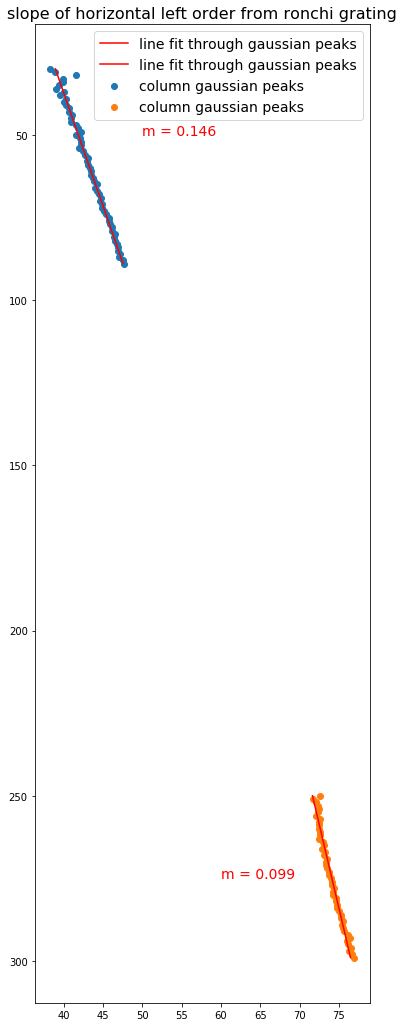

In [2023]:
m_hdiff=str(abs(round(gausvwing2[0]-gausvwing1[0],3)))

fig,ax = plt.subplots()

fig.set_size_inches(6, 18)

ax.scatter(gverwing1, Y1, label="column gaussian peaks")
ax.plot(gv1(Y1),Y1,color='red',label="line fit through gaussian peaks")
ax.scatter(gverwing2, Y2, label="column gaussian peaks")
ax.plot(gv2(Y2),Y2,color='red',label="line fit through gaussian peaks")
ax.text(50,50,'m = ' + str(round(gausvwing1[0],3)),fontsize=14,color='red')
ax.text(60,275,'m = ' + str(round(gausvwing2[0],3)),fontsize=14,color='red')
#ax.text(150,20,'diff between hor wings = ' + m_hdiff,fontsize=14,color='red')
ax.legend(fontsize=14)
ax.set_title("slope of horizontal left order from ronchi grating",fontsize=16)

ax=plt.gca()                            # get the axis
ax.set_ylim(ax.get_ylim()[::-1]) 


In [2024]:
gaushwing1

array([-0.15672408, 86.82025304])

In [2025]:
gaushwing2

array([-0.12198994, 80.20071589])

In [2026]:
gausvwing1

array([ 0.14601337, 34.56236323])

In [2027]:
gausvwing2

array([ 0.09872915, 46.96525398])

(1023.5, -407.63974064476923)

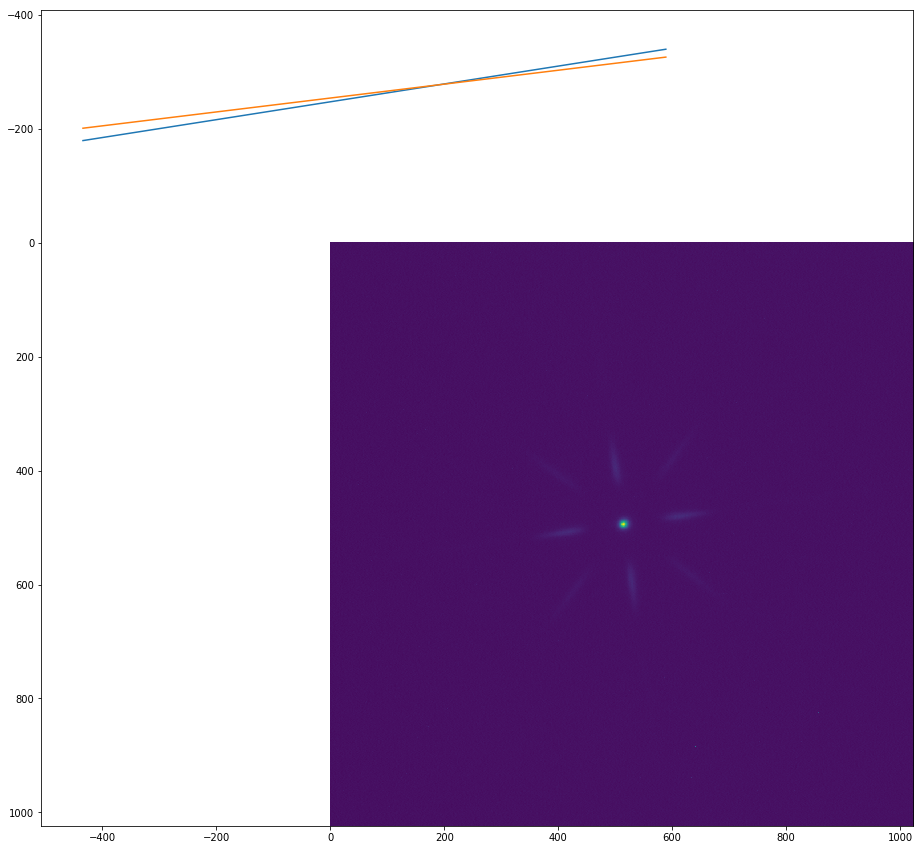

In [2060]:
ff=np.arange(1024)

fig,ax = plt.subplots()

fig.set_size_inches(20, 15)
ax.imshow(imarray,origin='lower')
#ax.imshow(imarray)

ax.plot(ff-434,gh1(ff-434)-334)
ax.plot(ff-434,gh2(ff-434)-334)


ax=plt.gca()                            # get the axis
ax.set_ylim(ax.get_ylim()[::-1]) 

In [1196]:
whichcol = 62

In [1197]:
data=subim[:,whichcol]

In [1198]:
subim[:,whichcol]

array([474, 530, 470, 489, 477, 499, 472, 529, 512, 468, 520, 490, 429,
       476, 409, 482, 460, 482, 408, 489, 513, 417, 495, 491, 474, 470,
       502, 434, 476, 427, 471, 466, 521, 488, 393, 439, 481, 389, 466,
       423, 485, 479, 510, 439, 495, 498, 461, 415, 451, 512, 495, 457,
       508, 467, 532, 660, 597, 602, 631, 638, 677, 587, 560, 567, 544,
       546, 503, 521, 503, 476, 447, 479, 443, 499, 465, 493, 500, 510,
       502, 459, 439, 470, 428, 410, 511, 448, 455, 435, 450, 493, 443,
       502, 498, 443, 482, 533, 468, 476, 465, 502, 479, 503, 507, 499,
       480, 489, 490, 464, 471, 479, 447, 506, 496, 440, 447, 493, 477,
       489, 489, 444], dtype=uint16)

In [1199]:
X=np.arange(120)

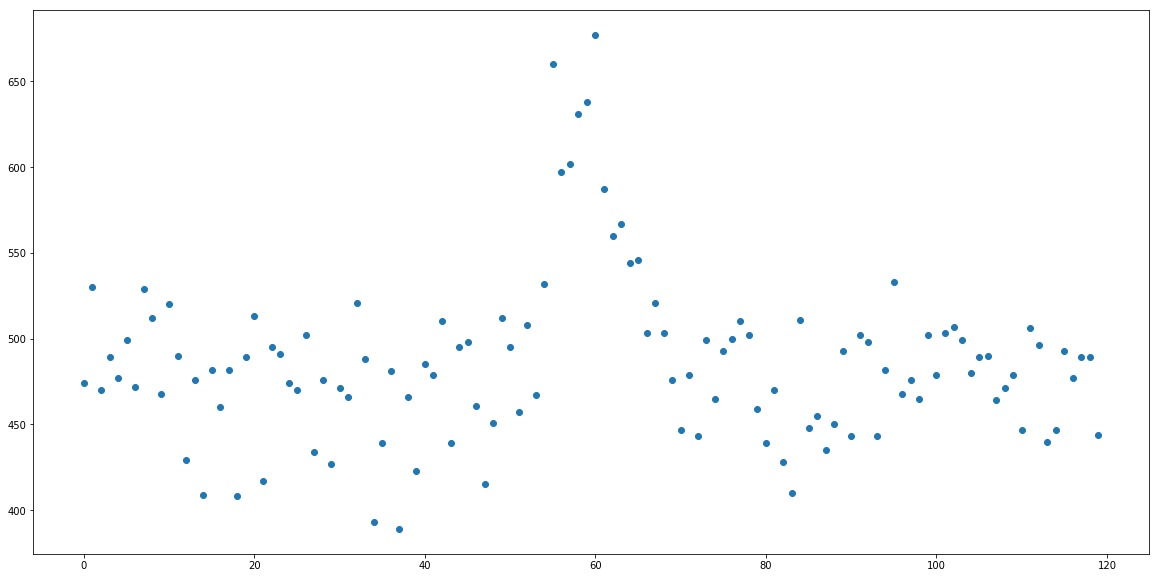

In [1200]:
plt.figure(figsize=(20, 10))

plt.scatter(X,data)


### Normalize our data column before fitting it

In [1201]:
x = X

#y=data
y=(data-np.amin(data))/(np.amax(data)-np.amin(data))


In [1202]:
np.mean(y)

0.3377893518518519

In [1203]:
print(rows)

120


In [1204]:
print(y)

[0.29513889 0.48958333 0.28125    0.34722222 0.30555556 0.38194444
 0.28819444 0.48611111 0.42708333 0.27430556 0.45486111 0.35069444
 0.13888889 0.30208333 0.06944444 0.32291667 0.24652778 0.32291667
 0.06597222 0.34722222 0.43055556 0.09722222 0.36805556 0.35416667
 0.29513889 0.28125    0.39236111 0.15625    0.30208333 0.13194444
 0.28472222 0.26736111 0.45833333 0.34375    0.01388889 0.17361111
 0.31944444 0.         0.26736111 0.11805556 0.33333333 0.3125
 0.42013889 0.17361111 0.36805556 0.37847222 0.25       0.09027778
 0.21527778 0.42708333 0.36805556 0.23611111 0.41319444 0.27083333
 0.49652778 0.94097222 0.72222222 0.73958333 0.84027778 0.86458333
 1.         0.6875     0.59375    0.61805556 0.53819444 0.54513889
 0.39583333 0.45833333 0.39583333 0.30208333 0.20138889 0.3125
 0.1875     0.38194444 0.26388889 0.36111111 0.38541667 0.42013889
 0.39236111 0.24305556 0.17361111 0.28125    0.13541667 0.07291667
 0.42361111 0.20486111 0.22916667 0.15972222 0.21180556 0.36111111
 0.

### attempt to do a gaussian fit on a column fits

In [1205]:
#@custom_model
def gauss_offset(x, amplitude=1., mean=0., stddev=1., H=0.):
    
    return H + amplitude * np.exp(-(x - mean) ** 2 / (2 * stddev ** 2))

def gauss_fit(x, y):
    mean = sum(x * y) / sum(y)
    stddev = np.sqrt(sum(y * (x - mean) ** 2) / sum(y))
    popt, pcov = curve_fit(gauss_offset, x, y, p0=[min(y), max(y), mean, stddev])
    return popt

In [1206]:
#g_init = models.Gaussian1D(amplitude=1., mean=0., stddev=1.)
##g_init = gaussian_offset(amplitude=1., mean=0., stddev=1., H=0.125)
#fit_g = fitting.LevMarLSQFitter()
#g = fit_g(g_init, x, y)

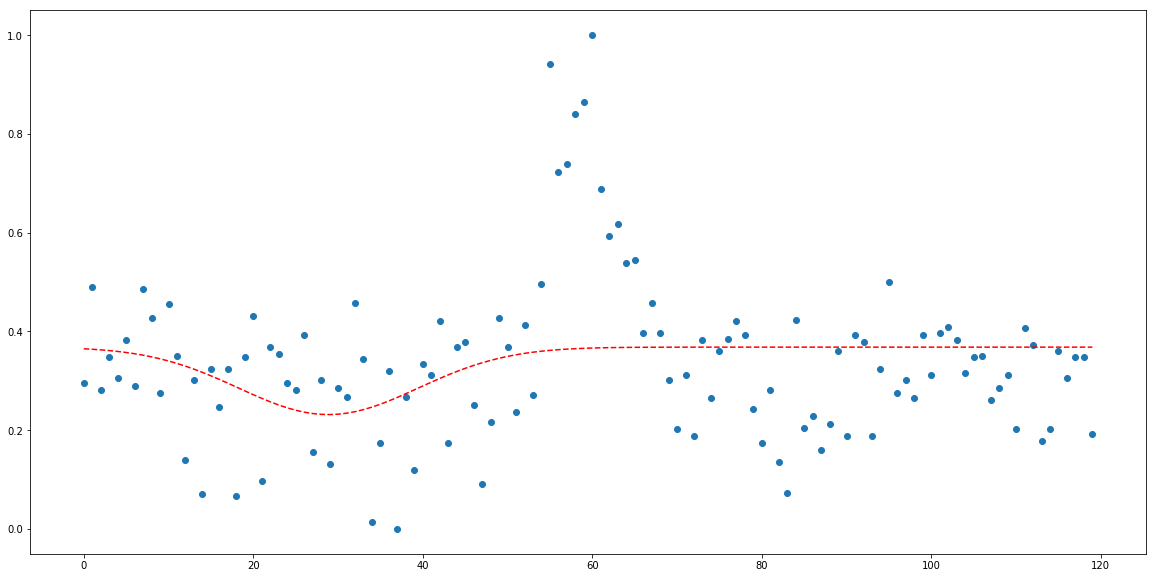

In [1207]:
H, A, x0, stddev = gauss_fit(x, y)

plt.figure(figsize=(20, 10))
#plt.plot(x, g(x), label='Gaussian', color='red')

plt.plot(x, gauss_offset(x, *gauss_fit(x, y)), '--r', label='fit')

plt.scatter(x,y)

In [1208]:
H, A, x0, stddev = gauss_fit(x, y)

In [1209]:
gauss_fit(x,y)

array([-0.13668869, 28.86731178, 10.60639299,  0.36798814])

In [1059]:
print(x)

[  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89
  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 112 113 114 115 116 117 118 119]


0.6993664442567887
78.16616738951677
-4.942820777061322
0.1222108029396631


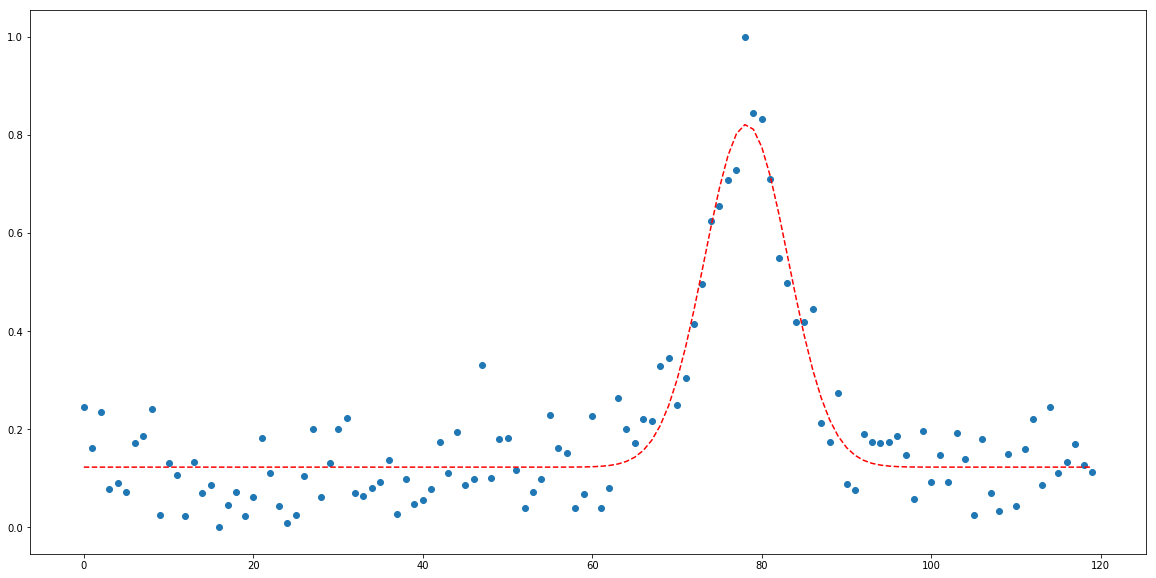

In [1710]:
data=subim[:,56]


y=(data-np.amin(data))/(np.amax(data)-np.amin(data))
    
x=np.arange(rows)

#y=y[35:120]
#x=x[35:120]


H, A, x0, stddev = gauss_fit(x, y)

print(H)
print(A)
print(x0)
print(stddev)

plt.figure(figsize=(20, 10))
#plt.plot(x, g(x), label='Gaussian', color='red')

plt.plot(x, gauss_offset(x, *gauss_fit(x, y)), '--r', label='fit')

plt.scatter(x,y)